In [56]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import Normalize

from PIL import Image as Image

import os

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [42]:
# load the torch model
model = torch.load("model.pt", map_location=torch.device('cpu'))
model.eval() # set the model to eval mode

# load the labels of the images
labels_df = pd.read_csv("./data/overall_labels.csv")
labels_df.rename(columns={"Unnamed: 0": "filename"}, inplace=True)

In [43]:
labels_df["predicted_HEALTHY"] = 0
labels_df["predicted_AKU"] = 0
labels_df.head()

,filename,HEALTHY,AKU,predicted_HEALTHY,predicted_AKU
0,AKU01.jpg,0.0,1.0,0,0
1,AKU01_composed_0.jpg,0.0,1.0,0,0
2,AKU01_composed_1.jpg,0.0,1.0,0,0
3,AKU01_composed_2.jpg,0.0,1.0,0,0
4,AKU01_composed_3.jpg,0.0,1.0,0,0


In [44]:
root_dir = "./data"
paths = []

original_dir = f"{root_dir}/original"
for filename in os.listdir(original_dir):
    path = f"{original_dir}/{filename}"
    paths.append( (filename, path) ) 

augmented_dir = f"{root_dir}/augmented"
for filename in os.listdir(augmented_dir):
    path = f"{augmented_dir}/{filename}"
    paths.append( (filename, path) ) 

In [45]:
labels_df.set_index("filename", inplace=True)

for filename, path in paths:
    image = Image.open(path).convert('RGB')
    normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    torch_img = torch.from_numpy(np.asarray(image)).permute(2, 0, 1).unsqueeze(0).float().div(255)
    torch_img = F.interpolate(torch_img, size=(256, 256), mode='bilinear', align_corners=False)
    normed_torch_img = normalizer(torch_img)

    predicted_healthy = model(normed_torch_img)[0][0].item()
    predicted_aku = model(normed_torch_img)[0][1].item()

    labels_df.at[filename, "predicted_HEALTHY"] = 1 if predicted_healthy > 0.5 else 0
    labels_df.at[filename, "predicted_AKU"] = 1 if predicted_aku > 0.5 else 0

/home/bendico765/Scrivania/Gianluca/Università/CHL-Project/venv/lib/python3.10/site-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


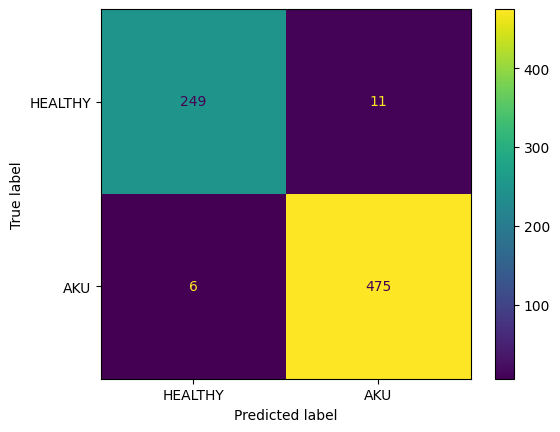

In [66]:
y = labels_df[["HEALTHY", "AKU"]].values.argmax(1)
y_pred = labels_df[["predicted_HEALTHY", "predicted_AKU"]].values.argmax(1)
cm = confusion_matrix(y, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HEALTHY", "AKU"])
disp.plot()

In [67]:
labels_df[ (labels_df["HEALTHY"] > 0.5) & (labels_df["predicted_HEALTHY"] > 0.5)]

,HEALTHY,AKU,predicted_HEALTHY,predicted_AKU
filename,,,,
HEALTHY01.jpg,1.000000,0.000000,1,0
HEALTHY01_composed_1.jpg,1.000000,0.000000,1,0
HEALTHY01_composed_2.jpg,1.000000,0.000000,1,0
HEALTHY01_composed_3.jpg,1.000000,0.000000,1,0
HEALTHY01_composed_6.jpg,1.000000,0.000000,1,0
...,...,...,...,...
cutmix_50.jpg,1.000000,0.000000,1,0
cutmix_51.jpg,1.000000,0.000000,1,0
mixup_48.jpg,0.900234,0.099766,1,0


In [68]:
labels_df[ (labels_df["AKU"] > 0.5) & (labels_df["predicted_AKU"] > 0.5)]

,HEALTHY,AKU,predicted_HEALTHY,predicted_AKU
filename,,,,
AKU01.jpg,0.0,1.0,0,1
AKU01_composed_0.jpg,0.0,1.0,0,1
AKU01_composed_1.jpg,0.0,1.0,0,1
AKU01_composed_2.jpg,0.0,1.0,0,1
AKU01_composed_3.jpg,0.0,1.0,0,1
...,...,...,...,...
mixup_53.jpg,0.0,1.0,0,1
mixup_54.jpg,0.0,1.0,0,1
mixup_55.jpg,0.0,1.0,0,1


In [69]:
labels_df[ (labels_df["HEALTHY"] > 0.5) & (labels_df["predicted_AKU"] > 0.5)]

,HEALTHY,AKU,predicted_HEALTHY,predicted_AKU
filename,,,,
HEALTHY01_composed_0.jpg,1.000000,0.000000,0,1
HEALTHY01_composed_4.jpg,1.000000,0.000000,0,1
HEALTHY01_composed_5.jpg,1.000000,0.000000,0,1
HEALTHY02_composed_1.jpg,1.000000,0.000000,0,1
HEALTHY02_composed_4.jpg,1.000000,0.000000,0,1
HEALTHY11_composed_7.jpg,1.000000,0.000000,0,1
HEALTHY11_composed_8.jpg,1.000000,0.000000,0,1
cutmix_4.jpg,0.567688,0.432312,0,1
cutmix_19.jpg,0.586112,0.413888,0,1


In [70]:
labels_df[ (labels_df["AKU"] > 0.5) & (labels_df["predicted_HEALTHY"] > 0.5)]

,HEALTHY,AKU,predicted_HEALTHY,predicted_AKU
filename,,,,
AKU03_composed_4.jpg,0.000000,1.000000,1,0
AKU24_composed_9.jpg,0.000000,1.000000,1,0
AKU30_composed_6.jpg,0.000000,1.000000,1,0
AKU36_composed_5.jpg,0.000000,1.000000,1,0
cutmix_3.jpg,0.238500,0.761500,1,0
mixup_3.jpg,0.235792,0.764208,1,0
